In [6]:
# Step 1: Install Required Libraries
!pip install -q sentence-transformers matplotlib scikit-learn

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

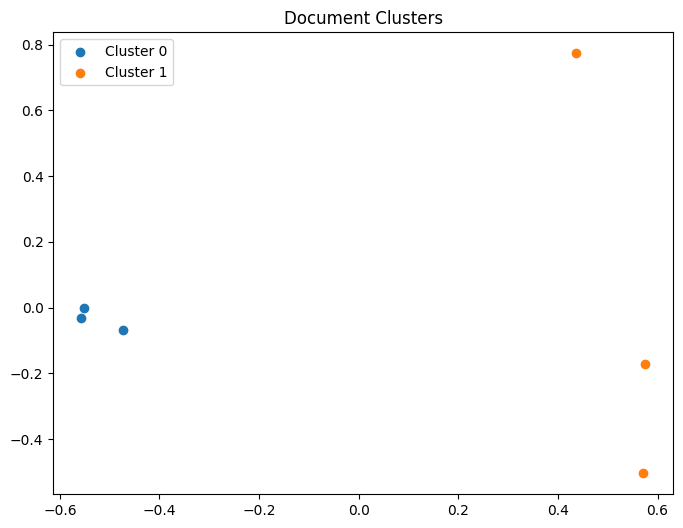

Document 0: The cat sits on the mat. -> Cluster 1
Document 1: Dogs are loyal animals. -> Cluster 1
Document 2: Cats and dogs are popular pets. -> Cluster 1
Document 3: The sun is a star. -> Cluster 0
Document 4: The earth revolves around the sun. -> Cluster 0
Document 5: Astronomy is the study of stars and planets. -> Cluster 0


In [7]:
# Step 2: Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sentence_transformers import SentenceTransformer

# Step 3: Load Data
# Replace this with your own document dataset
documents = [
    "The cat sits on the mat.",
    "Dogs are loyal animals.",
    "Cats and dogs are popular pets.",
    "The sun is a star.",
    "The earth revolves around the sun.",
    "Astronomy is the study of stars and planets."
]

# Step 4: Generate Embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')  # Lightweight Sentence-BERT model
embeddings = model.encode(documents)

# Step 5: Cluster Embeddings
num_clusters = 2  # Adjust the number of clusters based on your data
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
labels = kmeans.fit_predict(embeddings)

# Step 6: Visualize Clusters
# Reduce dimensions to 2D for visualization (using PCA or t-SNE)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Plot clusters
plt.figure(figsize=(8, 6))
for i in range(num_clusters):
    points = reduced_embeddings[labels == i]
    plt.scatter(points[:, 0], points[:, 1], label=f"Cluster {i}")

plt.legend()
plt.title("Document Clusters")
plt.show()

# Print Clustering Results
for i, doc in enumerate(documents):
    print(f"Document {i}: {doc} -> Cluster {labels[i]}")